In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
df = pd.read_csv("DataSet\\train.csv")

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
print(df.nunique())
print()
print(df.count())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [7]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

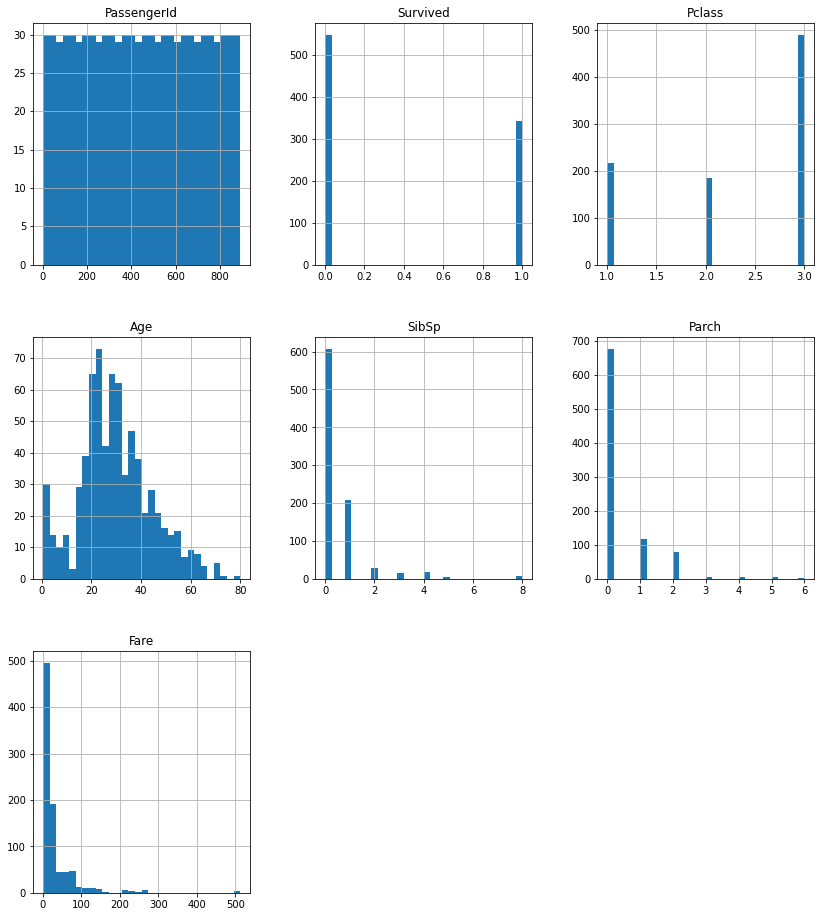

In [8]:
df.hist(figsize=(14,16),bins=30)

In [9]:
x = df.corr()
print(x["Survived"].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [10]:
def check(DF):
    print(DF.head())
    print()
    print()
    print(DF.describe())

In [49]:
def Initailize(DF, s = 1):
    Y = []
    DF.drop(columns="PassengerId",axis=1,inplace=True)
    DF.drop(columns="Name",axis=1,inplace=True)
    DF.drop(columns="Ticket",axis=1,inplace=True)
    DF.drop(columns="Cabin",axis=1,inplace=True)
    if s:
        Y = list(DF["Survived"].copy())
        DF.drop(columns="Survived",axis=1,inplace=True)
    
    return Y
    

In [45]:
def Create_Pipeline():
    return Pipeline([("imputer",SimpleImputer(strategy="median")),("Std_Scaler",StandardScaler())])

    
def Generate_Final_Train_DataSet(DataSet):
    x = list(DataSet)

    x.remove('Embarked')
    x.remove('Sex')

    Num_Attributes = x
    
    Category_Attribute = ["Embarked","Sex"]

    Num_Pipeline = Create_Pipeline()
    Full_Pipeline = ColumnTransformer([("NUMs",Num_Pipeline,Num_Attributes),("Category",OneHotEncoder(),Category_Attribute)])
    
    return Full_Pipeline.fit_transform(DataSet)

In [27]:
y_label = Initailize(df)

In [28]:
print(y_label)
print(type(y_label))

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [29]:
check(df)

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S


           Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200


In [33]:
X_Data = Generate_Final_Train_DataSet(df)
X_Data

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [31]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver="liblinear")
LR.fit(X_Data,y_label)

LogisticRegression(solver='liblinear')

In [38]:
Predicated = LR.predict(X_Data)

In [37]:
def Accuracy(Pred,Label):
    error = 0
    for i in range(len(Label)):
        if Pred[i] != Label[i]:
            error += 1

    print("Total wrong predication : ", error," Out of ", len(Label))
    acc =(100 - float(error)/float(len(Label))*100)
    print("Accuracy : ", acc)

In [39]:
Accuracy(Predicated,y_label)

Total wrong predication :  177  Out of  891
Accuracy :  80.13468013468014


In [62]:
def Initailize_Pred(Dataset):

    arrD = list(Dataset['Embarked'].unique())
    arrd = list(df['Embarked'].unique())
    adds = 0
    if len(arrD) < len(arrd):
        for i in arrd:
            if i not in arrD:
                d = pd.DataFrame({"Pclass":[Dataset["Pclass"][0]],"Sex":[Dataset["Sex"][0]],"Age":[Dataset["Age"][0]],"SibSp":[Dataset["SibSp"][0]],"Parch":[Dataset["Parch"][0]],"Fare":[Dataset["Fare"][0]],"Embarked":[i]})
                Dataset = Dataset.append(d,ignore_index=True)
                adds += 1

    print("Uniques Embarked added : ",adds)
    
    arrD.clear()
    arrd.clear()

    arrD = list(Dataset['Sex'].unique())
    arrd = list(df['Sex'].unique())
    adds = 0
    
    if len(arrD) < len(arrd):
        for i in arrd:
            if i not in arrD:
                d = pd.DataFrame({"Pclass":[Dataset["Pclass"][0]],"Sex":[i],"Age":[Dataset["Age"][0]],"SibSp":[Dataset["SibSp"][0]],"Parch":[Dataset["Parch"][0]],"Fare":[Dataset["Fare"][0]],"Embarked":[Dataset["Embarked"][0]]})
                Dataset = Dataset.append(d,ignore_index=True)
                adds += 1

    print("Uniques Sex added :",adds)

    print()
    print("Shape of Dataset : ", Dataset.shape)

    return Dataset


In [93]:
Test = pd.read_csv("DataSet\\test.csv")
Validity = pd.read_csv("DataSet\\gender_submission.csv")

In [94]:
Validity.drop(columns="PassengerId",axis=1,inplace=True)


In [95]:
Test_Labels = list(Validity["Survived"])
print(Test_Labels)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [66]:
Initailize(Test, 0)

[]

In [69]:
Test = Initailize_Pred(Test)
Test_Data = Generate_Final_Train_DataSet(Test)
Test_Data.shape

Uniques Embarked added :  1
Uniques Sex added : 0

Shape of Dataset :  (419, 7)
<class 'numpy.ndarray'>


C:\Users\Shubham\AppData\Local\Temp\ipykernel_12328\1557203149.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(d,ignore_index=True)


(419, 11)

In [116]:
Predicated_Test = LR.predict(Test_Data)

In [115]:
def Normalize_It(Pt, yl):
    return Pt[:len(yl)]

In [117]:
final_Predict = Normalize_It(Predicated_Test,Test_Labels)

In [118]:
print(final_Predict)
print(len(final_Predict))

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
418


In [119]:
Accuracy(final_Predict, Test_Labels)

Total wrong predication :  25  Out of  418
Accuracy :  94.01913875598086
